
Decision Tree Results:
Accuracy for Correct Predictions: 0.9725518522340316
Accuracy for Incorrect Predictions: 0.027448147765968378

Confusion Matrix:
[[16132   173     0     0     0     0     0     0     0]
 [  226  2264    51     0     0     0     0     0     0]
 [    0    43   361    15     0     0     0     0     0]
 [    0     0    18    68     3     0     0     0     0]
 [    0     0     0     2    16     1     0     0     0]
 [    0     0     0     0     0     6     0     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0     1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16305
           1       0.91      0.89      0.90      2541
           2       0.84      0.86      0.85       419
           3       0.80      0.76      0.78        89
           4       0.84      0.84     

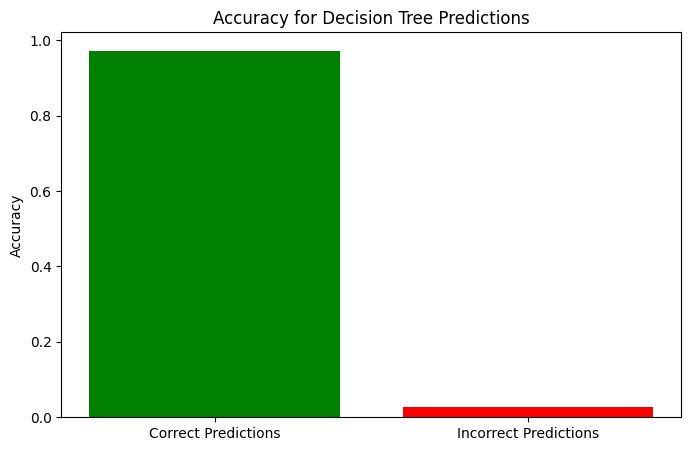

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load the dataset
file_path = 'output_dataset.csv'  # Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv(file_path)

# Drop non-numeric columns that are not needed for prediction
df = df.drop(['DayOfWeek', 'Date', 'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'Origin', 'Org_Airport', 'Dest', 'Dest_Airport', 'Cancelled', 'CancellationCode', 'Diverted'], axis=1)

# Define range-specific encoding function with 10 partitions
def range_encoding(value):
    if value <= 100:
        return '0-100'
    elif 101 <= value <= 200:
        return '101-200'
    elif 201 <= value <= 300:
        return '201-300'
    elif 301 <= value <= 400:
        return '301-400'
    elif 401 <= value <= 500:
        return '401-500'
    elif 501 <= value <= 600:
        return '501-600'
    elif 601 <= value <= 700:
        return '601-700'
    elif 701 <= value <= 800:
        return '701-800'
    elif 801 <= value <= 900:
        return '801-900'
    else:
        return '901-1000'

# Apply range-specific encoding to 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', and 'ArrDelay'
for col in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']:
    df[col] = df[col].apply(range_encoding)

# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features (X) and target variable (y)
X = df.drop('ArrDelay', axis=1)
y = df['ArrDelay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Calculate accuracy for correct predictions and (1 - accuracy) for incorrect predictions
correct_accuracy = accuracy
incorrect_accuracy = 1 - correct_accuracy

# Display the results
print("\nDecision Tree Results:")
print("Accuracy for Correct Predictions:", correct_accuracy)
print("Accuracy for Incorrect Predictions:", incorrect_accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the bar graph
labels = ['Correct Predictions', 'Incorrect Predictions']
accuracies = [correct_accuracy, incorrect_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['green', 'red'])
plt.ylabel('Accuracy')
plt.title('Accuracy for Decision Tree Predictions')
plt.show()

# Re-enable warnings after fitting the model
warnings.resetwarnings()
